In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.manifold import Isomap
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [2]:
def visualizeDifferentNeighbors(X, y):
    n_components = 2
    n_neighbors_set = [2,5,10,20,50,100]
    fig = plt.figure(figsize=(16,24))
    for n_neighbors in n_neighbors_set:
        ax = fig.add_subplot(3,2,n_neighbors_set.index(n_neighbors)+1)
        isomap = Isomap(n_neighbors=n_neighbors,
                        n_components=n_components,
                        eigen_solver='auto',
                        tol=0,
                        max_iter=None,
                        path_method='auto',
                        neighbors_algorithm='auto',
                        metric='minkowski',
                        p=2,
                        metric_params=None
                       )

        X_transf = isomap.fit_transform(X)
        for val in set(y):
            inds = y==val
            plt.scatter(X_transf[inds, 0],X_transf[inds, 1],label=val,alpha=0.3)
        plt.title(f'Isomap 2 components transformed data {n_neighbors} neighbors')
        plt.xlabel(r'$z_1$')
        plt.ylabel(r'$z_2$')
        plt.legend()
    plt.show()

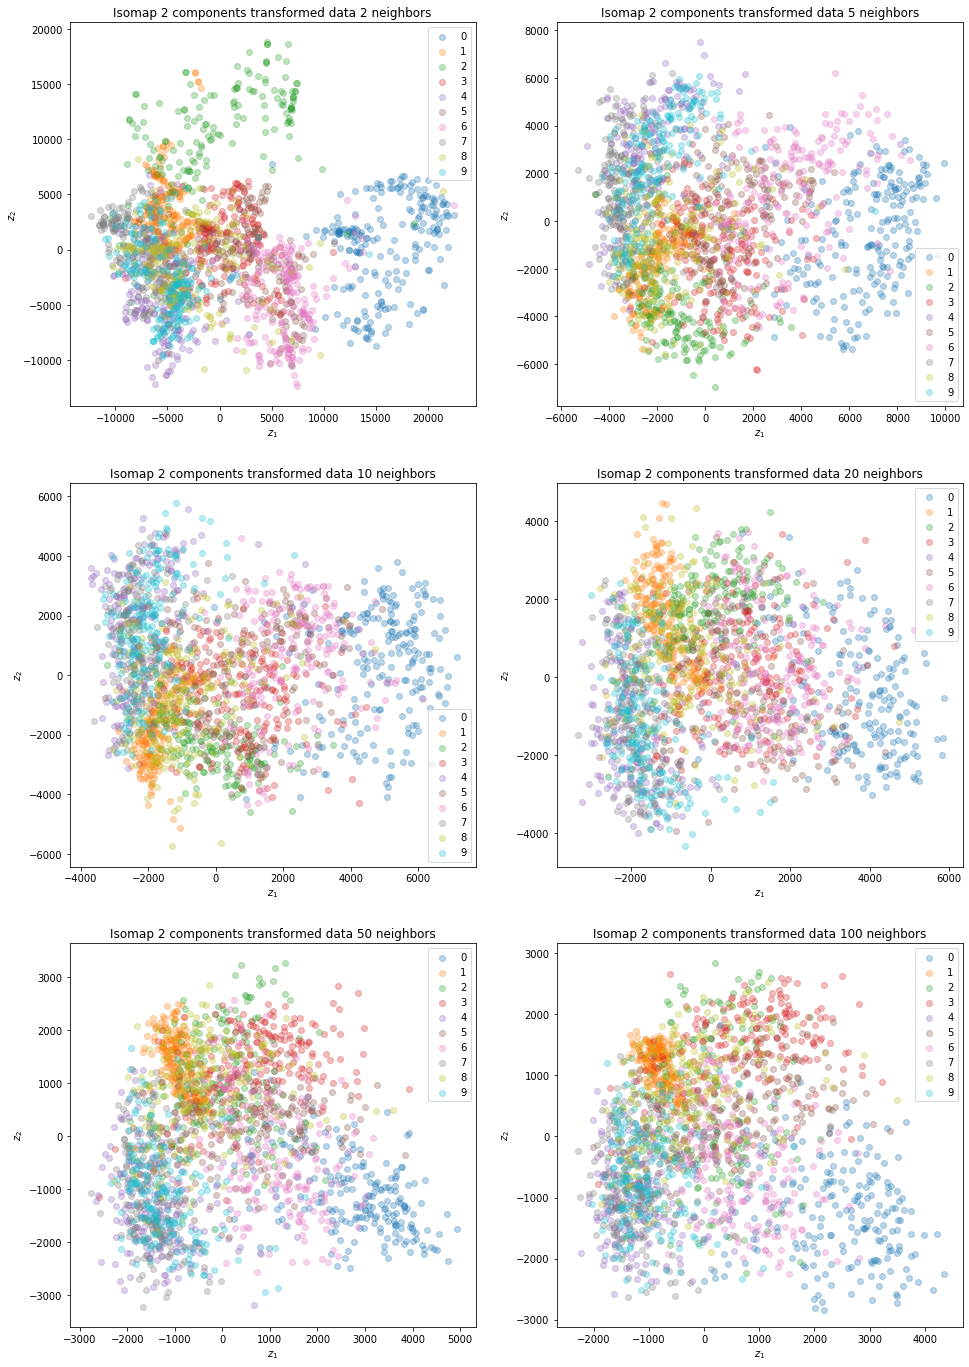

In [3]:
samples = 2000
visualizeDifferentNeighbors(X_train.iloc[:samples].astype(int).values, y_train.iloc[:samples].astype(int).values)